## Complex model without regulatory cells



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Импортируем один из пакетов Matplotlib
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 20, 50
# Импортируем пакет со вспомогательными функциями
from matplotlib import mlab
import math



In [2]:
def hiv_expanded(x,t,a_M,a_T,c2,c1,delta,e,f,k_8,k_m,k_v_,k_vm_,Macr,nu_Ab,nu_M,nu_4e,nu_4ie,nu_4n,nu_4in,nu_8e,\
                 nu_8n,nu_ii,nu_v,N,A,p,fi,p_im,po_Ab,po_4,po_8,r_4,r_8,v,s_,t1,t2,t3,k_Ab_, \
                                   k_1, k_2, psi, fib,s_2, p_2, f_1, f_2, k_4, delta_4, nu,Sb_2, \
                                   D_1, D_2, D_3, k_alpha_1, k_alpha_2, k_alpha_3, Cl_1, Cl_2,Cl_3,\
                                   V_c1, V_c2, V_c3, F_1, F_2, F_3, IC_50_1,IC_50_2,IC_50_3, t_l, \
                                   k_10, k_11, r, T_max):


    
#     define system
    T_4n_voln=x[0]
    T_4e_voln=x[1]
    T_4n_1i_voln=x[2]
    T_4n_2i_voln=x[3]
    T_4e_1i_voln=x[4]
    T_4e_2i_voln=x[5]
    T_4n=x[6]
    T_4e=x[7]
    T_4n_1i=x[8]
    T_4n_2i=x[9]
    T_4e_1i=x[10]
    T_4e_2i=x[11]
    T_ii_1=x[12]
    T_ii_2=x[13]
    T_8n_voln=x[14]
    T_8e_voln=x[15]
    T_8n=x[16]
    T_8e=x[17]
    S=x[18]
    M=x[19]
    M_1=x[20]
    M_2=x[21]
    V_1=x[22]
    V_2=x[23]
    
    s=s_*np.power((100-A-t/365)/100,1.8, dtype=np.float)
    u=(t+t1)/(t+t2)
    k_Ab=k_Ab_*(1+t/t3)*u
    k_v=k_v_*(1+t/t3)*u
    e_=e*(1+t/t3)*u
    k_vm=k_vm_*(1+t/t3)
    R=po_8*(T_ii_1+T_ii_2+delta*(T_4n_1i_voln+T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+T_4n_1i+T_4n_2i+T_4e_1i+\
                                 T_4e_2i+a_T/a_M*(M_1+M_2)))
    
    k_e1=Cl_1/V_c1
    k_e2=Cl_2/V_c2
    k_e3=Cl_3/V_c3
    C_1=F_1*D_1/V_c1*k_alpha_1/(k_alpha_1+k_e1)*(math.exp(-k_e1*(t-t_l))-math.exp(-k_alpha_1*(t-t_l)))
    C_2=F_2*D_2/V_c2*k_alpha_2/(k_alpha_2+k_e2)*(math.exp(-k_e2*(t-t_l))-math.exp(-k_alpha_2*(t-t_l)))
    C_3=F_3*D_3/V_c3*k_alpha_3/(k_alpha_1+k_e3)*(math.exp(-k_e3*(t-t_l))-math.exp(-k_alpha_3*(t-t_l)))
    u_1=((C_2/IC_50_2)+(C_3/IC_50_3))/(1+(C_2/IC_50_2)+(C_3/IC_50_3))
    u_2=C_1/(C_1+IC_50_1)
    
 
#      healthy hiv-specific
    dT_4n_volndt=v*f*(1-e_*(V_1+V_2)/(c1+V_1+V_2))*s+(1-fi)*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_voln-\
    (1-u_1)*(k_1*V_1+k_2*M_1)*T_4n_voln-fib*(k_1*V_2+k_2*M_2)*T_4n_voln-nu_4n*T_4n_voln+\
    r*(T_4n_voln+T_4e_voln+T_4n+T_4e)*(1-(T_ii_1+T_ii_2+T_4n_voln+T_4e_voln+T_4n+T_4e+T_4n_1i_voln+\
                                         T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+\
                                         T_4n_1i+T_4n_2i+T_4e_1i+T_4e_2i)/T_max)    
    dT_4e_volndt=fi*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_voln-(1-u_1)*(k_1*V_1+k_2*M_1)*T_4e_voln-\
    fib*(k_1*V_2+k_2*M_2)*T_4e_voln-nu_4e*T_4e_voln+\
    r*(T_4n_voln+T_4e_voln+T_4n+T_4e)*(1-(T_ii_1+T_ii_2+T_4n_voln+T_4e_voln+T_4n+T_4e+T_4n_1i_voln+\
                                         T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+\
                                         T_4n_1i+T_4n_2i+T_4e_1i+T_4e_2i)/T_max)   
#     lat inf
    dT_4n_1i_volndt=v*f*e_*(V_1+V_2)/(c1+V_1+V_2)*s+(1-u_1)*(1-psi)*(k_1*V_1+k_2*M_1)*T_4n_voln+\
            ((1-fi)*(1-p)-p)*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_1i_voln-(k_8*delta*T_8e_voln+nu_4in)*T_4n_1i_voln
    dT_4n_2i_volndt=v*f*e_*(V_1+V_2)/(c1+V_1+V_2)*s+(1-psi)*fib*(k_1*V_2+k_2*M_2)*T_4n_voln+\
            ((1-fi)*(1-p)-p)*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_2i_voln-(k_8*delta*T_8e_voln+nu_4in)*T_4n_2i_voln
    dT_4e_1i_volndt=fi*(1-p)*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_1i_voln+(1-u_1)*(1-psi)*(k_1*V_1+k_2*M_1)*T_4e_voln-\
                                                           (k_8*delta*T_8e_voln+nu_4ie)*T_4e_1i_voln
    dT_4e_2i_volndt=fi*(1-p)*po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_2i_voln+(1-psi)*fib*(k_1*V_2+k_2*M_2)*T_4e_voln-\
                                                           (k_8*delta*T_8e_voln+nu_4ie)*T_4e_2i_voln  
    
#     healthy non hiv specific
    dT_4ndt=(1-v)*f*(1-e_*(V_1+V_2)/(c1+V_1+V_2))*s+(1-fi)*r_4*T_4n-(1-u_1)*(k_1*V_1+k_2*M_1)*T_4n-\
    fib*(k_1*V_2+k_2*M_2)*T_4n-nu_4n*T_4n+r*(T_4n_voln+T_4e_voln+T_4n+T_4e)*(1-(T_ii_1+T_ii_2+T_4n_voln+\
                                         T_4e_voln+T_4n+T_4e+T_4n_1i_voln+\
                                         T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+\
                                         T_4n_1i+T_4n_2i+T_4e_1i+T_4e_2i)/T_max)                                                           
    dT_4edt=fi*r_4*T_4n-(1-u_1)*(k_1*V_1+k_2*M_1)*T_4e-fib*(k_1*V_2+k_2*M_2)*T_4e-nu_4e*T_4e+\
    r*(T_4n_voln+T_4e_voln+T_4n+T_4e)*(1-(T_ii_1+T_ii_2+T_4n_voln+T_4e_voln+T_4n+T_4e+T_4n_1i_voln+\
                                         T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+\
                                         T_4n_1i+T_4n_2i+T_4e_1i+T_4e_2i)/T_max)
    

    #latently infected LT1

    dT_4n_1idt=(1-v)*f*e_*(V_1+V_2)/(c1+V_1+V_2)*s+(1-u_1)*(1-psi)*(k_1*V_1+k_2*M_1)*T_4n+\
                ((1-fi)*(1-p)-p)*r_4*T_4n_1i-(k_8*delta*T_8e_voln+nu_4in)*T_4n_1i       
    dT_4n_2idt=(1-v)*f*e_*(V_1+V_2)/(c1+V_1+V_2)*s+(1-psi)*fib*(k_1*V_2+k_2*M_2)*T_4n+\
                ((1-fi)*(1-p)-p)*r_4*T_4n_2i-(k_8*delta*T_8e_voln+nu_4in)*T_4n_2i   
    dT_4e_1idt=fi*(1-p)*r_4*T_4n_1i+ (1-u_1)*(1-psi)*(k_1*V_1+k_2*M_1)*T_4e-(k_8*delta*T_8e_voln+nu_4ie)* T_4e_1i                                                       
    dT_4e_2idt=fi*(1-p)*r_4*T_4n_2i+ (1-psi)*fib*(k_1*V_2+k_2*M_2)*T_4e-(k_8*delta*T_8e_voln+nu_4ie)* T_4e_2i                           
    
    
    #actively infected cells
    dT_ii_1dt=(1-u_1)*psi*(k_1*V_1+k_2*M_1)*(T_4n_voln+T_4e_voln+T_4n+T_4e)+p*(r_4*T_4n_1i+r_4*T_4n_2i+\
    po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_1i_voln+po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_2i_voln)-(k_8*T_8e_voln+nu_ii)*T_ii_1
    dT_ii_2dt=psi*fib*(k_1*V_2+k_2*M_2)*(T_4n_voln+T_4e_voln+T_4n+T_4e)+p*(r_4*T_4n_1i+r_4*T_4n_2i+\
    po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_1i_voln+po_4*(V_1+V_2)/(c2+V_1+V_2)*T_4n_2i_voln)-(k_8*T_8e_voln+nu_ii)*T_ii_2
                                                           
    #T8 cells
    dT_8n_volndt=v*(1-f)*s+(1-fi)*R*T_8n_voln-nu_8n*T_8n_voln
    dT_8e_volndt=fi*R*T_8n_voln-nu_8e*T_8e_voln
    dT_8ndt=(1-v)*(1-f)*s+(1-fi)*r_8*T_8n-nu_8n*T_8n
    dT_8edt=fi*r_8*T_8n-nu_8e*T_8e
    
   
    
    #antibody cells
    dSdt=po_Ab*(T_4e_voln+T_4e_1i_voln+T_4e_2i_voln)*(V_1+V_2)/(c2+V_1+V_2)-k_Ab*(V_1+V_2)*S-nu_Ab*S
    
    #macrophages
    dMdt=s_2+p_2*(V_1+V_2)*M/(V_1+V_2+Sb_2)-(1-f_1*u_1)*k_4*V_1*M-fib*k_4*V_2*M-delta_4*M
    dM_1dt=(1-f_1*u_1)*k_4*V_1*M-nu_M*M_1-k_8*delta*T_8e_voln*M_1
    dM_2dt=fib*k_4*V_2*M-nu_M*M_2-k_8*delta*T_8e_voln*M_2
    
#     viruses
    dV_1dt=(1-u_2)*(1-nu)*N*nu_ii*T_ii_1/a_T+(1-f_2*u_2)*(1-nu)*p_im/a_M*M_1+nu*fib*N*nu_ii*T_ii_2/a_T+nu*fib*p_im/a_M*M_2-\
            e_*V_1/(c1+V_1)*s/a_T-k_v/a_T*V_1/(c2+V_1)*(T_4n_voln+T_4e_voln+T_4n+T_4e)-k_Ab*S*V_1-k_m*V_1/(V_1+c2)*M/a_M-\
            (k_10*(T_4n_voln+T_4e_voln+T_4n+T_4e)+k_11*M)*V_1-nu_v*V_1
    dV_2dt=(1-u_2)*nu*N*nu_ii*T_ii_1/a_T+(1-f_2*u_2)*nu*p_im/a_M*M_1+(1-nu)*fib*N*nu_ii*T_ii_2/a_T+(1-nu)*fib*p_im/a_M*M_2-\
            e_*V_2/(c1+V_2)*s/a_T-k_v/a_T*V_2/(c2+V_2)*(T_4n_voln+T_4e_voln+T_4n+T_4e)-k_Ab*S*V_2-k_m*V_2/(V_2+c2)*M/a_M-\
            (k_10*(T_4n_voln+T_4e_voln+T_4n+T_4e)+k_11*M)*V_2-nu_v*V_2

#     print (u_2) 
# #     print(r*(T_4n_voln+T_4e_voln+T_4n+T_4e)*(1-(T_ii_1+T_ii_2+T_4n_voln+T_4e_voln+T_4n+T_4e+T_4n_1i_voln+\
#                                          T_4n_2i_voln+T_4e_1i_voln+T_4e_2i_voln+\
#                                          T_4n_1i+T_4n_2i+T_4e_1i+T_4e_2i)/T_max))
#     
    return [dT_4n_volndt, dT_4e_volndt,  dT_4n_1i_volndt, dT_4n_2i_volndt, dT_4e_1i_volndt,dT_4e_2i_volndt,\
            dT_4ndt,  dT_4edt,dT_4n_1idt, dT_4n_2idt, dT_4e_1idt, dT_4e_2idt, dT_ii_1dt,dT_ii_2dt,dT_8n_volndt,\
            dT_8e_volndt, dT_8ndt, dT_8edt, dSdt, dMdt, dM_1dt,dM_2dt,dV_1dt, dV_2dt]

# initial condition
x0 = [0.92,0,0,0,0,0,920,379,0,0,0,0,0,0,0.47,0,467,150,0,360,0,0,3,0]


# constants

a_M=0.03
a_T=0.06
c2=1000
c1=616.6
delta=0.001
e=0.064
f=0.524
k_8=2.5
k_m=60
k_v_=0.089
k_vm_=1.19
Macr=360
nu_Ab=0.023
nu_M=0.087
nu_4e=0.015
nu_4ie=0.015
nu_4n=0.05
nu_4in=0.05
nu_8e=0.018
nu_8n=0.006
nu_ii=0.47
nu_v=3
N=850
A=36
p=0.03
fi=0.64
p_im=34
po_Ab=155
po_4=1.98
po_8=0.36
r_4=0.0097
r_8=0.0091
v=0.001
s_=6.09
t1=7
t2=42
t3=40000
k_Ab_=0.5
k_1=0.0000387
k_2=0.000001
psi=0.97
fib=0.9
s_2=0.15
p_2=0.15
f_1=0.34
f_2=0.34
k_4=0.000522
delta_4=0.005
nu=0.001
Sb_2=188
D_1=600
D_2=150
D_3=300
k_alpha_1=2.4
k_alpha_2=12
k_alpha_3=12
Cl_1=14800
Cl_2=560
Cl_3=2690
V_c1=28.7
V_c2=91
V_c3=112
F_1=1.0
F_2=0.86
F_3=0.64
IC_50_1=0.11
IC_50_2=0.34
IC_50_3=0.13
k_10=0.00000779
k_11=0.000001  
t_l=0
r=0.03
T_max=1500
# time points
t = np.linspace(0,100)



In [3]:
# solve ODE
x = odeint(hiv_expanded, x0, t, args=(a_M,a_T,c2,c1,delta,e,f,k_8,k_m,k_v_,k_vm_,Macr,nu_Ab,nu_M,nu_4e,nu_4ie,nu_4n,nu_4in,nu_8e,\
                nu_8n,nu_ii,nu_v,N,A,p,fi,p_im,po_Ab,po_4,po_8,r_4,r_8,v,s_,t1,t2,t3,k_Ab_, \
                k_1, k_2, psi, fib,s_2, p_2, f_1, f_2, k_4, delta_4, nu,Sb_2, \
                D_1, D_2, D_3, k_alpha_1, k_alpha_2, k_alpha_3, Cl_1, Cl_2,Cl_3,\
                V_c1, V_c2, V_c3, F_1, F_2, F_3, IC_50_1,IC_50_2,IC_50_3, t_l, \
                k_10, k_11, r, T_max))

In [4]:
T_4n_voln=x[:,0]
T_4e_voln=x[:,1]
T_4n_1i_voln=x[:,2]
T_4n_2i_voln=x[:,3]
T_4e_1i_voln=x[:,4]
T_4e_2i_voln=x[:,5]
T_4n=x[:,6]
T_4e=x[:,7]
T_4n_1i=x[:,8]
T_4n_2i=x[:,9]
T_4e_1i=x[:,10]
T_4e_2i=x[:,11]
T_ii_1=x[:,12]
T_ii_2=x[:,13]
T_8n_voln=x[:,14]
T_8e_voln=x[:,15]
T_8n=x[:,16]
T_8e=x[:,17]
S=x[:,18]
M=x[:,19]
M_1=x[:,20]
M_2=x[:,21]
V_1=x[:,22]
V_2=x[:,23]

dynamics of T4 healthy cells

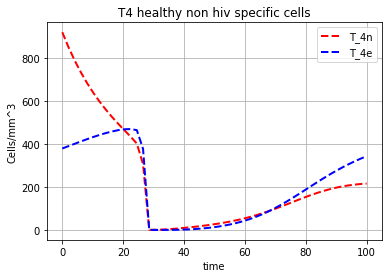

In [5]:
plt.plot(t,T_4n,'r--',linewidth=2,label='T_4n')
plt.plot(t,T_4e, 'b--',linewidth=2,label='T_4e')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.grid()
plt.title('T4 healthy non hiv specific cells')
plt.legend()
plt.show()

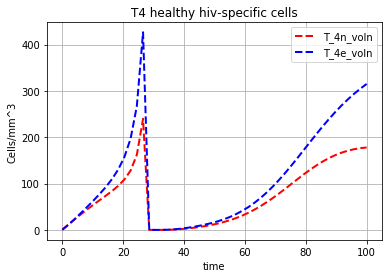

In [6]:
plt.plot(t,T_4n_voln,'r--',linewidth=2,label='T_4n_voln')
plt.plot(t,T_4e_voln, 'b--',linewidth=2,label='T_4e_voln')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('T4 healthy hiv-specific cells')
plt.grid()
plt.legend()
plt.show()

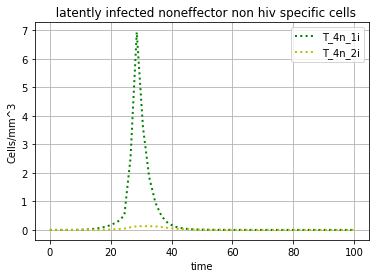

In [7]:
plt.plot(t,T_4n_1i,'g:',linewidth=2,label='T_4n_1i')
plt.plot(t,T_4n_2i, 'y:',linewidth=2,label='T_4n_2i')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')

plt.grid()
plt.title('  latently infected noneffector non hiv specific cells')
plt.legend()
plt.show()

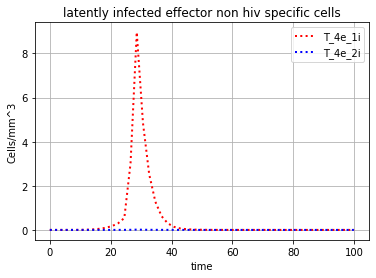

In [8]:
plt.plot(t,T_4e_1i,'r:',linewidth=2,label='T_4e_1i')
plt.plot(t,T_4e_2i, 'b:',linewidth=2,label='T_4e_2i')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('latently infected effector non hiv specific cells')
plt.grid()
plt.legend()
plt.show()

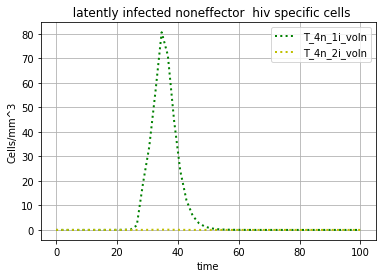

In [9]:
plt.plot(t,T_4n_1i_voln,'g:',linewidth=2,label='T_4n_1i_voln')
plt.plot(t,T_4n_2i_voln, 'y:',linewidth=2,label='T_4n_2i_voln')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.grid()
plt.title('  latently infected noneffector  hiv specific cells')
plt.legend()
plt.show()

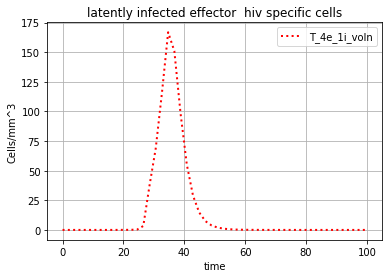

In [10]:
plt.plot(t,T_4e_1i_voln,'r:',linewidth=2,label='T_4e_1i_voln')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('latently infected effector  hiv specific cells')
plt.grid()
plt.legend()
plt.show()

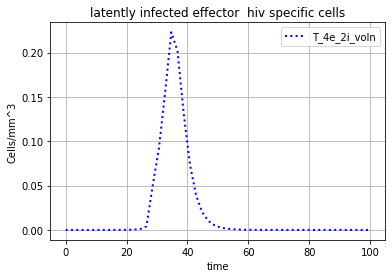

In [11]:
plt.plot(t,T_4e_2i_voln, 'b:',linewidth=2,label='T_4e_2i_voln')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('latently infected effector  hiv specific cells')
plt.grid()
plt.legend()
plt.show()

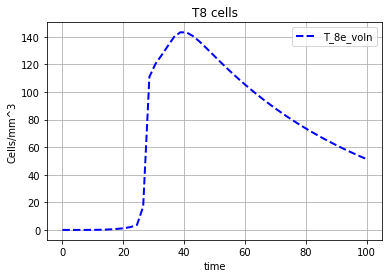

In [12]:
plt.plot(t,T_8e_voln, 'b--',linewidth=2,label='T_8e_voln')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.grid()
plt.title('T8 cells')
plt.legend()
plt.show()

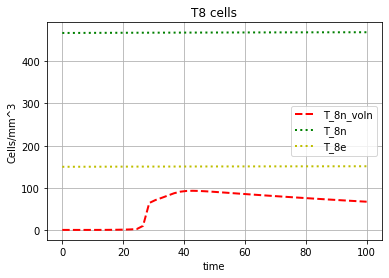

In [13]:
plt.plot(t,T_8n_voln,'r--',linewidth=2,label='T_8n_voln')
plt.plot(t,T_8n,'g:',linewidth=2,label='T_8n')
plt.plot(t,T_8e, 'y:',linewidth=2,label='T_8e')
plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.grid()
plt.title("T8 cells")
plt.legend()
plt.show()

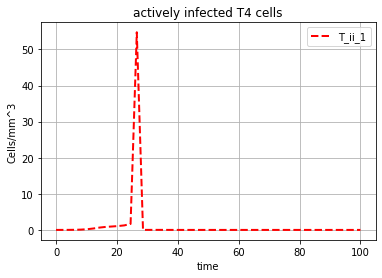

In [14]:
plt.plot(t,T_ii_1,'r--',linewidth=2,label='T_ii_1')
# plt.plot(t,T_ii_2, 'b--',linewidth=2,label='T_ii_2')

plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('actively infected T4 cells')
plt.grid()
plt.legend()
plt.show()

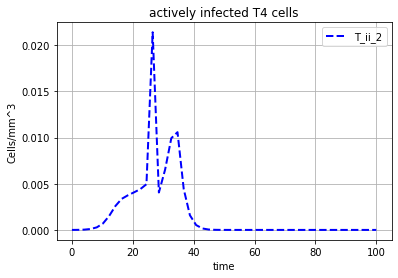

In [15]:
plt.plot(t,T_ii_2, 'b--',linewidth=2,label='T_ii_2')

plt.xlabel('time')
plt.ylabel('Cells/mm^3')
plt.title('actively infected T4 cells')
plt.grid()
plt.legend()
plt.show()

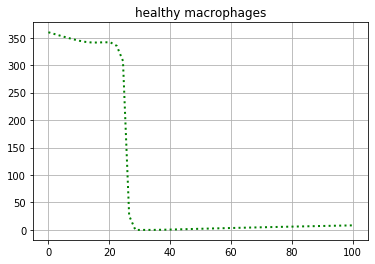

In [16]:

plt.plot(t, M,'g:',linewidth=2,label='Macrophages')
plt.title('healthy macrophages')
plt.grid()
plt.show()

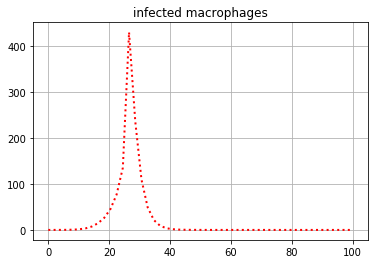

In [17]:
plt.plot(t,M_1, 'r:',linewidth=2,label='M_1')
# plt.plot(t, M_2,'g:',linewidth=2,label='M_2')

plt.grid()
plt.title('infected macrophages')
plt.show()

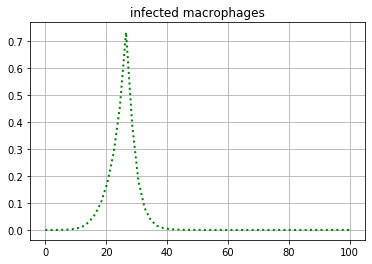

In [18]:
plt.plot(t, M_2,'g:',linewidth=2,label='M_2')

plt.grid()
plt.title('infected macrophages')
plt.show()

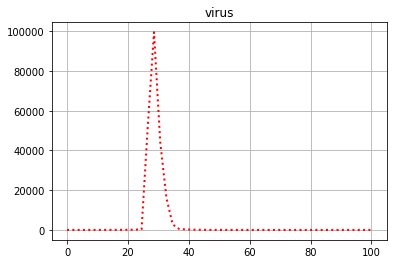

In [19]:
plt.plot(t,V_1, 'r:',linewidth=2,label='Virus_1')
# plt.plot(t, V_2,'g:',linewidth=2,label='Virus_2')
plt.title('virus')
plt.grid()
plt.show()

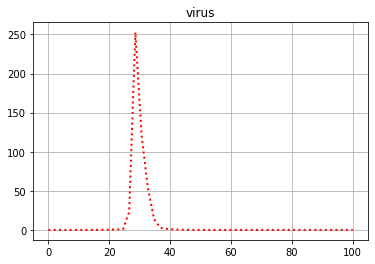

In [20]:
plt.plot(t,V_2, 'r:',linewidth=2,label='Virus_2')
# plt.plot(t, V_2,'g:',linewidth=2,label='Virus_2')
plt.title('virus')
plt.grid()
plt.show()

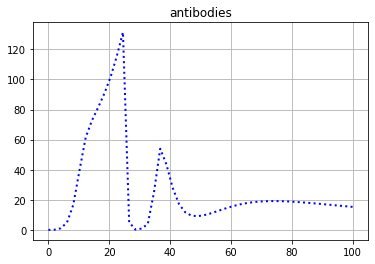

In [21]:
plt.plot(t, S, 'b:',linewidth=2,label='Antibodies')
plt.grid()
plt.title('antibodies')
plt.show()